# 0. Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기

In [7]:
df = pd.read_csv("data/winequalityN_imblance.csv")

In [8]:
df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality_range         6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# 2.결측치 처리

In [13]:
null_sum = df.isnull().sum()

In [15]:
percent = (df.isnull().sum()/df.isnull().count())
pd.concat([null_sum,percent], axis =1, keys= ['null_sum', 'percent'])

,null_sum,percent
type,0,0.000000
fixed_acidity,10,0.001539
volatile_acidity,8,0.001231
citric_acid,3,0.000462
residual_sugar,2,0.000308
chlorides,2,0.000308
free_sulfur_dioxide,0,0.000000
total_sulfur_dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


In [16]:
def null_cell(df): 
    total_missing_values = df.isnull().sum() 
    missing_values_per = df.isnull().sum()/df.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

# 3. EDA 탐색적 데이터 분석

In [17]:
fill_list = (null_cell(df)).index

In [18]:
fill_list

Index(['fixed_acidity', 'pH', 'volatile_acidity', 'sulphates', 'citric_acid',
       'residual_sugar', 'chlorides'],
      dtype='object')

In [27]:
df_mean = df.copy()

for col in fill_list:
    df_mean.loc[:, col].fillna(df_mean.loc[:, col].mean(), inplace=True)

In [29]:
df_mean.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality_range           0
dtype: int64

In [33]:
corr_matrix = df_mean.corr()
corr_list = corr_matrix.quality_range.abs().sort_values(ascending=False).index[0:]

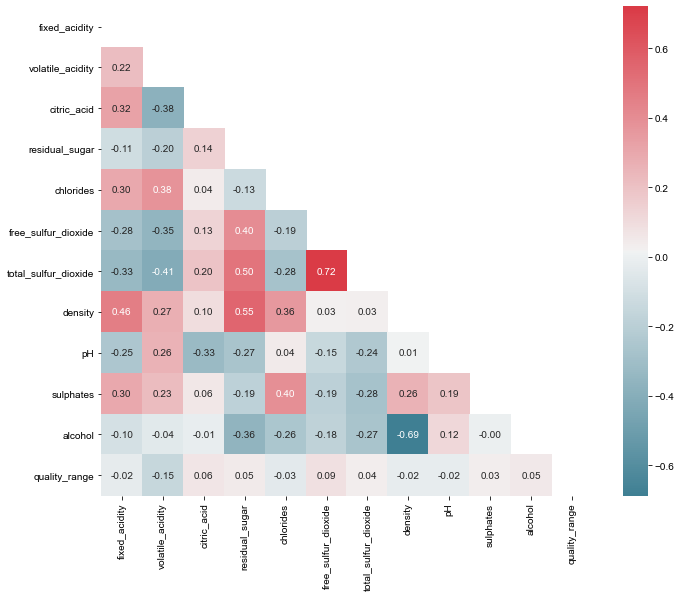

In [35]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

#### Distribution of Variables

In [36]:
from scipy.stats import norm 

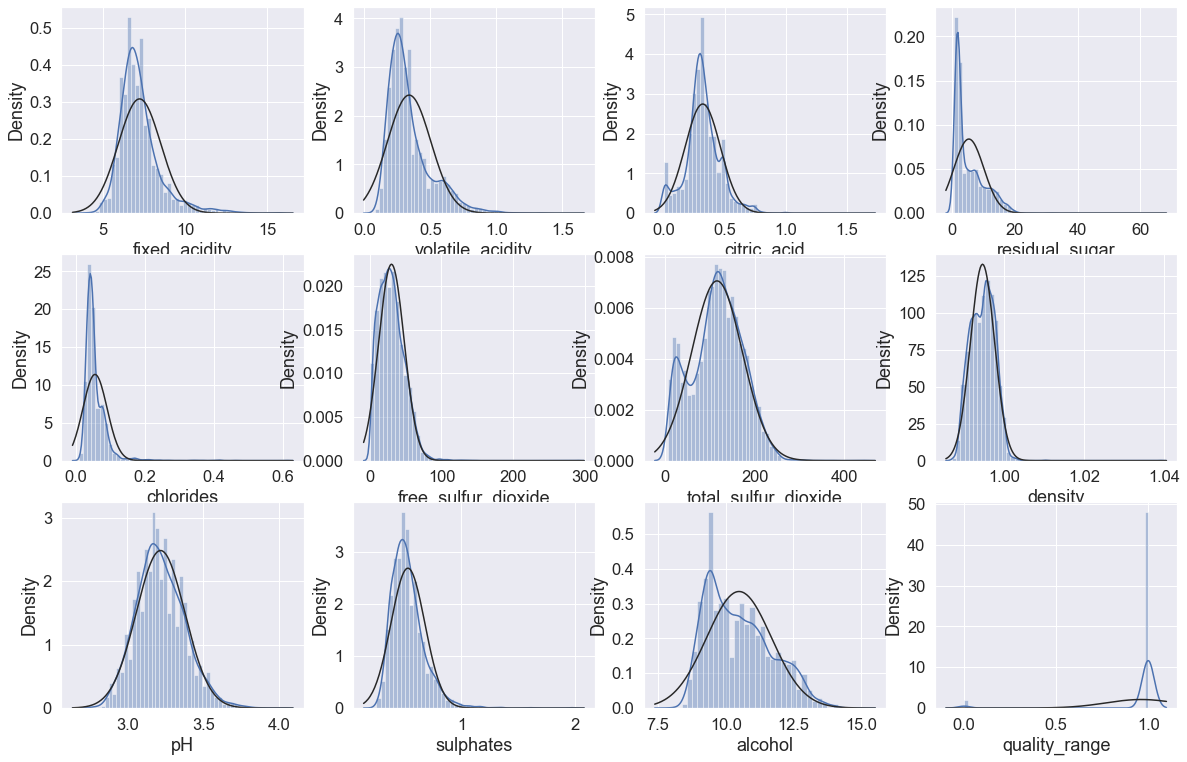

In [37]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(df_mean[df_mean.columns[i]], fit=norm)

# 4. EDA: Bins 사용

In [38]:
df_bins = df_mean.copy()

In [39]:
df_bins

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_range
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1


In [42]:
bins = [0,5,10]

labels = [0, 1] # 'low'=0, 'high'=1
df_bins['quality']= pd.cut(x=df_bins['quality_range'], bins=bins, labels=labels)

print(df_bins[['quality','quality_range']].head(5))

df_bins = df_bins.drop('quality_range', axis=1) 

  quality  quality_range
0       0              1
1       0              1
2       0              1
3       0              1
4       0              1


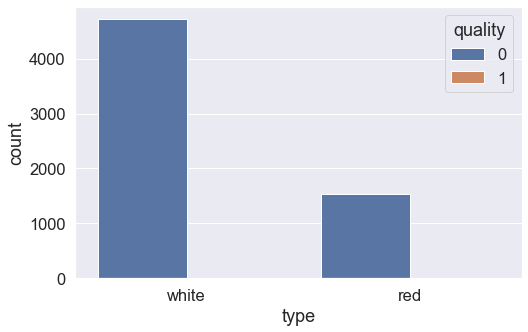

In [46]:
plt.figure(figsize=(8,5))

sns.countplot(x = 'type', hue = 'quality', data = df_bins)
plt.show()

In [ ]:
plt.figure(figsize=(8,7))
sns.scatterplot(x='quality_range', 
                y='alcohol', 
                hue='type',
                data=df_bins);
plt.xlabel('Quality',size=15)
plt.ylabel('Alcohol', size =15)
plt.show()